In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

----------------

# EDA

In [2]:
df1 = pd.read_json('../../Data/metadata-sitios/1.json', lines=True)

In [3]:
df2 = pd.read_json('../../Data/metadata-sitios/2.json', lines=True)

In [4]:
df3 = pd.read_json('../../Data/metadata-sitios/3.json', lines=True)

In [5]:
df4 = pd.read_json('../../Data/metadata-sitios/4.json', lines=True)

In [6]:
df5 = pd.read_json('../../Data/metadata-sitios/5.json', lines=True)

In [7]:
df6 = pd.read_json('../../Data/metadata-sitios/6.json', lines=True)

In [8]:
df7 = pd.read_json('../../Data/metadata-sitios/7.json', lines=True)

In [9]:
df8 = pd.read_json('../../Data/metadata-sitios/8.json', lines=True)

In [10]:
df9 = pd.read_json('../../Data/metadata-sitios/9.json', lines=True)

In [11]:
df10 = pd.read_json('../../Data/metadata-sitios/10.json', lines=True)

In [12]:
df11 = pd.read_json('../../Data/metadata-sitios/11.json', lines=True)

In [13]:
dataframes = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11]

In [14]:
df = pd.concat(dataframes, axis=0, ignore_index=True)

In [15]:
df.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


## Caracteristicas y Nulos

In [16]:
df.shape

(3025011, 15)

In [17]:
df.columns

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')

In [18]:
df.isnull().sum()

name                     37
address               80511
gmap_id                   0
description         2770722
latitude                  0
longitude                 0
category              17419
avg_rating                0
num_of_reviews            0
price               2749808
hours                787405
MISC                 690834
state                746455
relative_results     295058
url                       0
dtype: int64

### Consideramos lo siguiente:
- name: eliminamos nulos porque sin nombre no sabes a que local representa
- adress: eliminamos nulos porque sin adress no podremos saber en dond esta ubicado el local
- descripcion: dejamos los valores nulos porque no utilizamos estos datos
- category: eliminamos nulos porque sin categorias no podremos clasificar los negocios
- price, hours, MISC, state, relative_results: Estos metadatos no van a ser necesarios para nuestro analisis, por lo tanto los ignoramos

In [19]:
# Eliminamos nulos de categorias, name y adress, ya que esos datos no nos van a servir
df = df[df['name'].notna()]
df = df[df['address'].notna()]
df = df[df['category'].notna()]

## Duplicados

In [20]:
# Identificar las columnas que contienen listas
columns_list = df.map(lambda x: isinstance(x, list)).any()

columns_list 

name                False
address             False
gmap_id             False
description         False
latitude            False
longitude           False
category             True
avg_rating          False
num_of_reviews      False
price               False
hours                True
MISC                False
state               False
relative_results     True
url                 False
dtype: bool

Identificamos los duplicados en "name" "address" "gmap_id" y "url"

In [21]:
for col in df[['name','address','gmap_id','url']]:
    num_duplicados = df[col].duplicated().sum()
    print(f"Número de duplicados en la columna '{col}': {num_duplicados}")

Número de duplicados en la columna 'name': 708160
Número de duplicados en la columna 'address': 28491
Número de duplicados en la columna 'gmap_id': 25356
Número de duplicados en la columna 'url': 25356


consideramos que solo gmap_id y url no deberian tener duplicados. Para name un duplicado podria ser un negocio que pertenese a una cadena, mientras que para address podria ser un centro comercial que tiene muchos negocios

In [22]:
df = df.drop_duplicates(subset=['gmap_id','url'])

In [23]:
for col in df[['name','address','gmap_id','url']]:
    num_duplicados = df[col].duplicated().sum()
    print(f"Número de duplicados en la columna '{col}': {num_duplicados}")

Número de duplicados en la columna 'name': 682804
Número de duplicados en la columna 'address': 3135
Número de duplicados en la columna 'gmap_id': 0
Número de duplicados en la columna 'url': 0


--------

## Outliers

### Category

In [24]:
# Ver cuántas categorías tiene cada negocio 
df['num_categories'] = df['category'].apply(len)

df.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,num_categories
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...,1
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...,1
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...,1
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...,1
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...,1


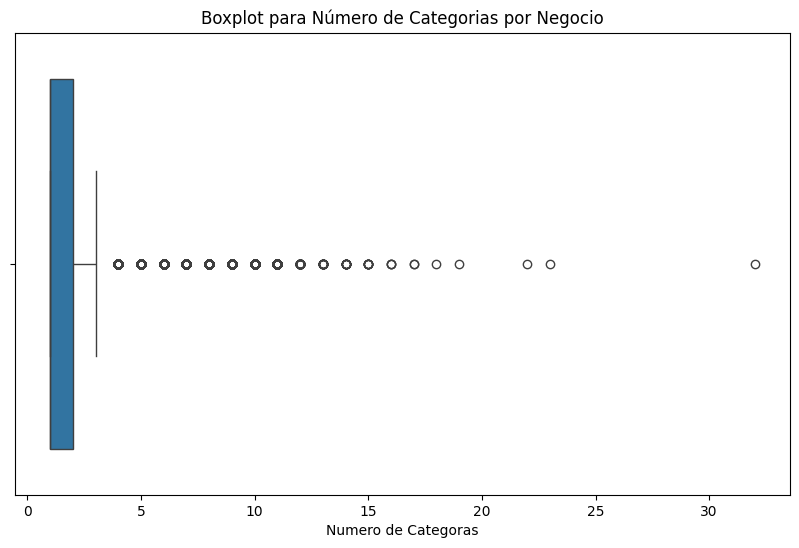

In [25]:
# BOXPLOT COLUMNA num_categories
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['num_categories'])
plt.title('Boxplot para Número de Categorias por Negocio')
plt.xlabel('Numero de Categoras')
plt.show()

In [26]:
df['num_categories'].mean()

2.0630089636182554

Podemos aprecias que la mayoria de los negocios tienen muy pocas categorias asignadas, entre 1 y 3

In [27]:
# Detectar outliers en la cantidad de categorías
outliers_categories = df[df['num_categories'] > 20]  # Por ejemplo, más de 20 categorías es inusual
outliers_categories

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,num_categories
662003,Diamante Leasing,"Diamante Leasing, 1318 Gravesend Neck Rd, Broo...",0x89c24484b823fed3:0x74f6329f85c4f381,None,40.594460,-73.956822,"[Car leasing service, Acura dealer, Audi deale...",4.9,38,None,"[[Friday, 10AM–8PM], [Saturday, 10AM–6PM], [Su...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 10AM,"[0x89c2445e2fd8bda1:0xa8f48e7791daa0c, 0x89c24...",https://www.google.com/maps/place//data=!4m2!3...,32
754435,Marcus Lumber Company,"Marcus Lumber Company, 409 N Locust St, Marcus...",0x878da684ff9e47d9:0x8879f6718354b2f8,None,42.826290,-95.806133,"[Home improvement store, Air conditioning cont...",4.8,38,None,"[[Monday, 7:30AM–5PM], [Tuesday, 7:30AM–5PM], ...","{'Service options': ['Curbside pickup', 'Deliv...",Open ⋅ Closes 5PM,"[0x878d919ea9a20d51:0xfd706140b4295c3d, 0x878d...",https://www.google.com/maps/place//data=!4m2!3...,23
1929018,Bell Foods Fresh Inc,"Bell Foods Fresh Inc, 3350 Hillside Avenue, Ne...",0x89c28801576a92a1:0xe8183528656d5f08,None,40.752516,-73.659048,"[Asian restaurant, Bakery, Butcher shop, Cafe,...",5.0,3,None,"[[Friday, 7AM–9PM], [Saturday, 7AM–9PM], [Sund...","{'Service options': ['Takeout', 'Delivery'], '...",Closes soon ⋅ 9PM ⋅ Opens 7AM Sat,"[0x89c287e69f074b45:0xece8d72b58f13559, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...,22


In [28]:
outliers_categories = df[df['num_categories'] > 10]  # Mayor a 10
outliers_categories

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,num_categories
8586,La Matcha Cafe,"La Matcha Cafe, 1828 El Camino Real UNIT 102, ...",0x808f7792bd0c683d:0xefefd9d96f8fcb11,None,37.595535,-122.383812,"[Lunch restaurant, Bakery, Breakfast restauran...",4.9,28,None,"[[Wednesday, 9:30AM–2:30PM], [Thursday, 9:30AM...",{'From the business': ['Identifies as women-le...,Closed ⋅ Opens 9:30AM Thu,"[0x808f77b4825974c7:0xa8db9e4556040b9b, 0x808f...",https://www.google.com/maps/place//data=!4m2!3...,11
25552,Hannah's General Store,"Hannah's General Store, 725 W Jefferson Ave, C...",0x87c5696c2304eb11:0xf60dbc11df643d20,None,37.503074,-92.832255,"[General store, ATM, Convenience store, Fried ...",3.8,8,None,"[[Tuesday, 5AM–9PM], [Wednesday, 5AM–9PM], [Th...","{'Service options': ['In-store shopping', 'Del...",Closed ⋅ Opens 5AM Wed,"[0x87c577424d689bb9:0xa73a1c7e49f621e3, 0x87c5...",https://www.google.com/maps/place//data=!4m2!3...,11
73947,Dougherty's Pond and Garden Center,"Dougherty's Pond and Garden Center, 104 Main S...",0x89c729a20ccb0681:0x31546596c3a51445,None,39.801392,-75.346210,"[Garden center, Fertilizer supplier, Hardware ...",4.6,5,None,"[[Monday, 10AM–4PM], [Tuesday, 10AM–4PM], [Wed...","{'Service options': ['In-store shopping'], 'Ac...",Closed ⋅ Opens 10AM Tue,"[0x89c6d0aecae0a985:0x85817069b7271947, 0x89c6...",https://www.google.com/maps/place//data=!4m2!3...,12
76886,The Silk Road NY,"The Silk Road NY, 101 Pondfield Rd, Bronxville...",0x89c292afca9aa2b5:0xba6fbb6ff73daffc,None,40.939540,-73.832694,"[Stores and shopping, Bedding store, Candle st...",3.8,3,None,"[[Monday, 11AM–5PM], [Tuesday, 11AM–5PM], [Wed...",None,Closed ⋅ Opens 11AM Tue,"[0x89c292aeebfe6e45:0x3b2277f69cff2875, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...,11
80168,Xanadu Salon and Spa,"Xanadu Salon and Spa, 19786 TX-105 Ste 140, Mo...",0x864721ea71232e53:0x10b74df4110d5341,None,30.386359,-95.666543,"[Spa, Barber shop, Beauty salon, Day spa, Faci...",4.8,68,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x8647218a65ecd3d5:0x1e4c63cf28850680, 0x8647...",https://www.google.com/maps/place//data=!4m2!3...,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981948,Audi Frederick,"Audi Frederick, 6001 Urbana Pike, Frederick, M...",0x89c9da475034dcc7:0x9c73003698adcea6,None,39.398906,-77.407185,"[Audi dealer, Auto body parts supplier, Auto b...",4.4,258,None,"[[Monday, 9AM–8PM], [Tuesday, 9AM–8PM], [Wedne...","{'Service options': ['In-store shopping'], 'Ac...",Closes soon ⋅ 8PM ⋅ Opens 9AM Tue,"[0x89b7ca27bb1034a3:0x29a8ab65ea61a28d, 0x89b7...",https://www.google.com/maps/place//data=!4m2!3...,13
2984213,Mario's Auto Repair,"Mario's Auto Repair, 434 S Egg Harbor Rd, Hamm...",0x89c1280daaaaaaab:0x2a2034c0a6df5355,None,39.630021,-74.796222,"[Auto repair shop, Air conditioning repair ser...",4.7,37,None,"[[Monday, 8:30AM–6PM], [Tuesday, 8:30AM–6PM], ...","{'Offerings': ['Oil change'], 'Amenities': ['M...",Closed ⋅ Opens 8:30AM Tue,"[0x89c1280daaaaaaab:0x2a2034c0a6df5355, 0x89c0...",https://www.google.com/maps/place//data=!4m2!3...,11
2988893,BlackRock Center for the Arts,"BlackRock Center for the Arts, 12901 Town Comm...",0x89b62c1447955deb:0x75e28faa225a676a,"Venue for visual & performing arts, presenting...",39.181645,-77.267142,"[Arts organization, Adult education school, Af...",4.4,48,None,"[[Monday, 10AM–6PM], [Tuesday, 10AM–6PM], [Wed...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 10AM Tue,"[0x89b62d7f4ab74b5d:0x66674d3c8e18bb8, 0x89b7d...",https://www.google.com/maps/place//data=!4m2!3...,11
3020422,Cor Automotive,"Cor Automotive, 1620 2nd Ave N, Billings, MT 5...",0x53487ad8bbb0bd7b:0xd0ecf54676001f0c,None,45.789509,-108.492758,"[Auto repair shop, Auto body parts supplier, A...",4.0,17,None,"[[Monday, 8AM–5PM], [Tuesday, 8AM–5PM], [Wedne...",None,Permanently closed,"[0x53487b246b1d51e1:0x47f0fb990

### num_of_reviews

In [29]:
# Detectar outliers usando el método del IQR
Q1 = df['num_of_reviews'].quantile(0.25)
Q3 = df['num_of_reviews'].quantile(0.75)
IQR = Q3 - Q1

# Definir umbrales para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers_reviews = df[(df['num_of_reviews'] < lower_bound) | (df['num_of_reviews'] > upper_bound)]
outliers_reviews

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,num_categories
10,Lush Family Dental,"Lush Family Dental, 2505 SE Encompass Dr, Wauk...",0x87ec2394c2cd9d2d:0xd1119cfbee0da6f3,None,41.585292,-93.855113,"[Dentist, Cosmetic dentist, Dental clinic]",5.0,178,None,"[[Thursday, 7AM–4PM], [Friday, 8AM–12PM], [Sat...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 4PM,"[0x87ec2482098b661f:0xacadacaa27d2c8d0, 0x87ee...",https://www.google.com/maps/place//data=!4m2!3...,3
12,Lena’s Beauty Nails Lashes Brows,"Lena’s Beauty Nails Lashes Brows, 657 NE Ventu...",0x87ec2481df6626b5:0xff5627745308ec2b,None,41.616310,-93.858345,[Beauty salon],4.2,128,None,"[[Thursday, 9AM–7PM], [Friday, 9AM–7PM], [Satu...","{'Health & safety': ['Appointment required'], ...",Open ⋅ Closes 7PM,"[0x87ec20ce836cac57:0x83bd66577e9a7a32, 0x87ee...",https://www.google.com/maps/place//data=!4m2!3...,1
151,Miyamoto Family Dental,"Miyamoto Family Dental, 2530 S Parker Rd #201,...",0x876c87f681db8d45:0x8c80933b2bdaf571,None,39.671107,-104.863793,[Dentist],5.0,178,None,"[[Thursday, 8AM–2PM], [Friday, Closed], [Satur...",{'From the business': ['Identifies as women-le...,Open ⋅ Closes 2PM,"[0x876c7da724c4111b:0x834cb560f27b7364, 0x876c...",https://www.google.com/maps/place//data=!4m2!3...,1
284,Sommer's Buick GMC Service Center,"Sommer's Buick GMC Service Center, 7211 W Mequ...",0x8804e359002eff79:0x8436a7da20ca077e,None,43.220805,-87.998947,"[Auto repair shop, Auto body shop, Brake shop,...",5.0,188,None,"[[Thursday, 7AM–6PM], [Friday, 7AM–6PM], [Satu...","{'Highlights': ['LGBTQ friendly'], 'Accessibil...",Open ⋅ Closes 6PM,None,https://www.google.com/maps/place//data=!4m2!3...,10
335,Nurture Pediatrics,"Nurture Pediatrics, 741 President Pl #210, Smy...",0x88640cea7d985e0b:0xf214c6bf1d01be6c,None,35.977670,-86.559821,[Pediatrician],4.4,138,None,"[[Thursday, 7:30AM–4:45PM], [Friday, 7:30AM–4:...",{'From the business': ['Identifies as women-le...,Open ⋅ Closes 4:45PM,"[0x88640cea6fd5cdc1:0x2b2efb8666094cf2, 0x8864...",https://www.google.com/maps/place//data=!4m2!3...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3024992,Reuben's Marc,"Reuben's Marc, 8131 Stenton Ave, Philadelphia,...",0x89c6b993431d9a19:0xea378de3c317996e,None,40.067534,-75.179153,"[Bar & grill, Bar]",4.0,223,$,"[[Monday, 4PM–12AM], [Tuesday, 4PM–12AM], [Wed...","{'Service options': ['Takeout', 'Dine-in', 'De...",Permanently closed,"[0x89c6b9e802822b75:0x5dedce940b31450b, 0x89c6...",https://www.google.com/maps/place//data=!4m2!3...,2
3025002,Enterprise Rent-A-Car,"Enterprise Rent-A-Car, 33521 S Dixie Hwy, Home...",0x88d9e749a61cd6a5:0x7396cf8e8dadf8bf,None,25.455505,-80.474782,"[Car rental agency, Van rental agency]",4.2,158,None,"[[Monday, 7:30AM–6PM], [Tuesday, 7:30AM–6PM], ...",{'From the business': ['Identifies as women-le...,Open ⋅ Closes 6PM,"[0x88d9e77c766a8c85:0xcc2f11e980934812, 0x88d9...",https://www.google.com/maps/place//data=!4m2!3...,2
3025005,Palm Gardens,"Palm Gardens, 52 Elm St, Cortland, NY 13045",0x89da6b8177ee49d5:0xbc9dfc53722fe1,None,42.602261,-76.173393,[Bar & grill],4.0,128,$,"[[Monday, 8AM–2AM], [Tuesday, 8AM–2AM], [Wedne...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 2AM,"[0x89da6c739859e46b:0xce1188b0e281b5c1, 0x89da...",https://www.google.com/maps/place//data=!4m2!3...,1
3025006,Steak 48,"Steak 48, 260 S Broad St, Philadelphia, PA 19102",0x89c6c74f43a49b55:0x6be6995921c58b12,None,39.947254,-75.164953,"[Steak house, Fine dining restaurant, Seafood ...",4.6,308,None,"[[Monday, 4–10PM], [Tuesday, 4–10PM], [Wednesd...","{'Service options': ['Takeout', 'Dine-in', 'De...",Closed ⋅ Opens 4PM,"[0x89c6c7af1a55f4f9:0x589bb93addf7fd95, 0x89c6...",https://www.google.com/maps/place//data=!4m2!3...,3


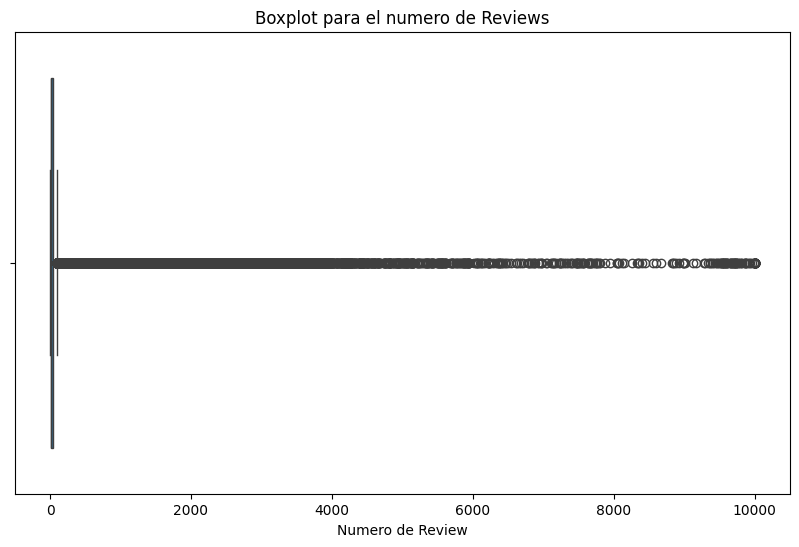

In [30]:
# GRAFICA BOXPLOT VISUALIZACION DE POSIBLES OUTLIERS EN reiview_count
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['num_of_reviews'])
plt.title('Boxplot para el numero de Reviews')
plt.xlabel('Numero de Review')
plt.show()

In [31]:
df['num_of_reviews'].mean()

44.36564256495263

Podemos ver que ya mayoria de los negocios tiene muy pocas reviews

## Analisis Philadelphia

Principalmente vamos a utilizar los datos de philadelphia, por lo que vamos a analizar estos especificamente

In [32]:
df_philadelphia = df[df['address'].str.contains('philadelphia', case=False, na=False)]

In [33]:
df_philadelphia.shape

(14914, 16)

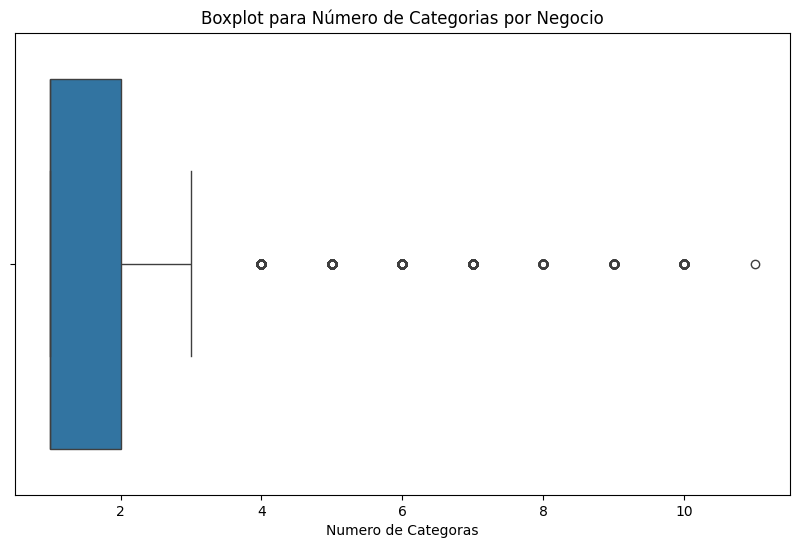

In [34]:
# BOXPLOT COLUMNA num_categories
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_philadelphia['num_categories'])
plt.title('Boxplot para Número de Categorias por Negocio')
plt.xlabel('Numero de Categoras')
plt.show()

In [35]:
df_philadelphia['num_categories'].mean()

1.9157838272763845

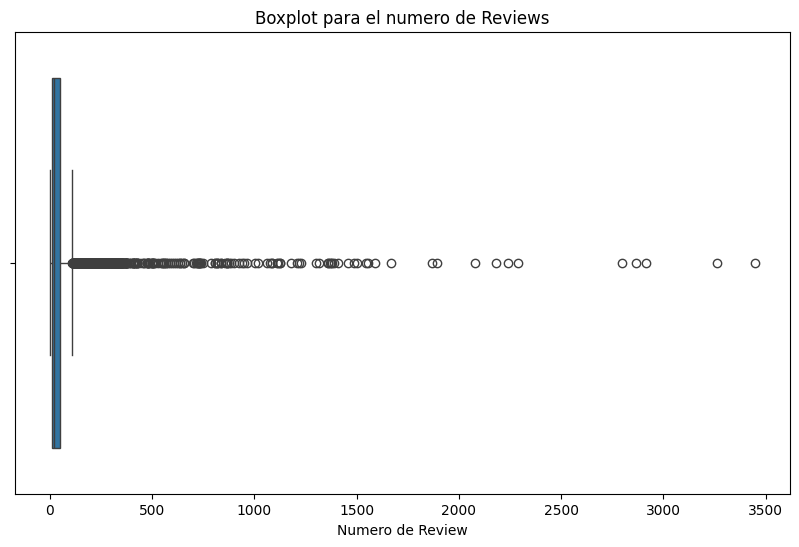

In [36]:
# GRAFICA BOXPLOT VISUALIZACION DE POSIBLES OUTLIERS EN num_reviews
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_philadelphia['num_of_reviews'])
plt.title('Boxplot para el numero de Reviews')
plt.xlabel('Numero de Review')
plt.show()

In [37]:
df_philadelphia['num_of_reviews'].mean()

43.91336998793081

## Analisis de categorias

In [38]:
df_exploded = df_philadelphia.explode('category')

In [39]:
category_counts = df_exploded['category'].value_counts()

In [40]:
top_categories = category_counts.head(20)

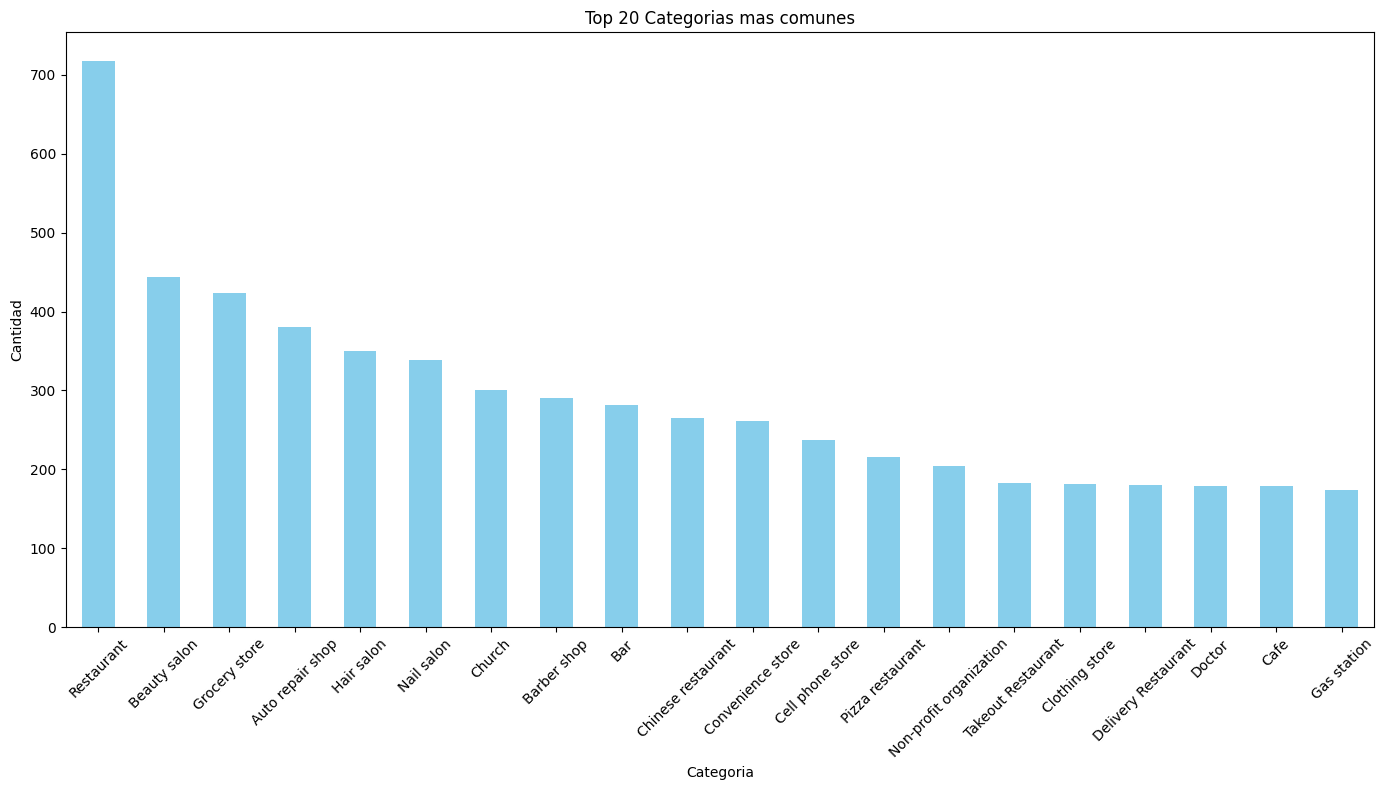

In [41]:
plt.figure(figsize=(14, 8))

top_categories.plot(kind='bar', color='skyblue')

plt.xlabel('Categoria')
plt.ylabel('Cantidad')
plt.title('Top 20 Categorias mas comunes')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
bot_categories = category_counts.tail(25)

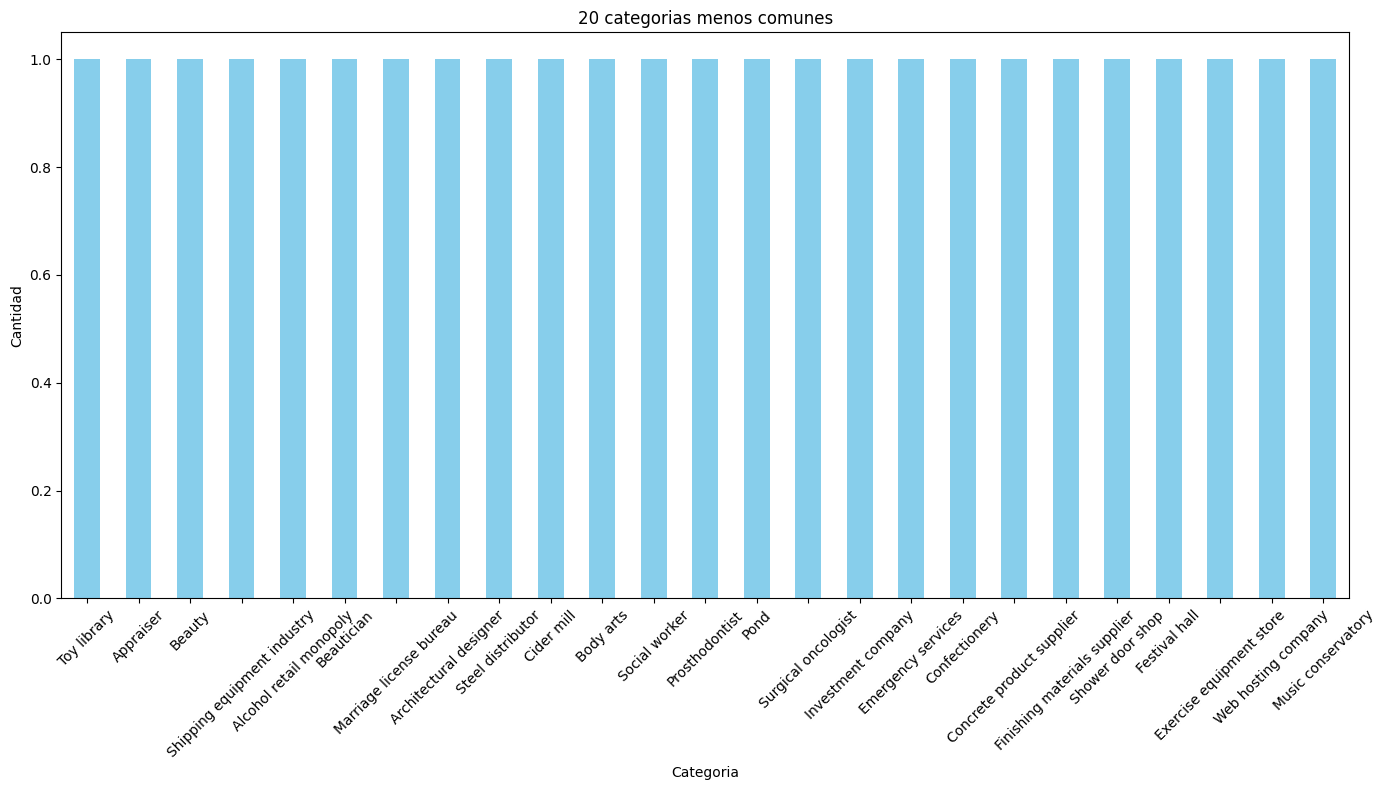

In [43]:
plt.figure(figsize=(14, 8))

bot_categories.plot(kind='bar', color='skyblue')

plt.xlabel('Categoria')
plt.ylabel('Cantidad')
plt.title('20 categorias menos comunes')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
category_counts.mean()

12.981372103589278

Podemos ver que hay muchas categorias que solo aparecen una sola vez

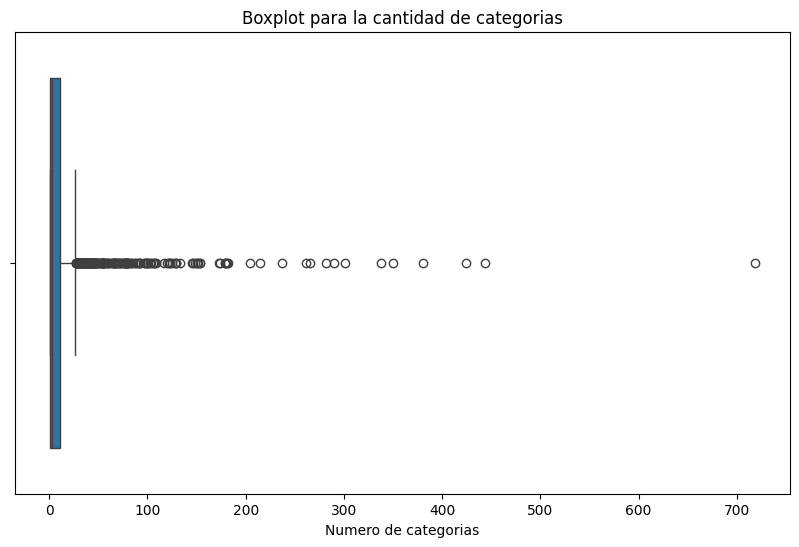

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=category_counts)
plt.title('Boxplot para la cantidad de categorias')
plt.xlabel('Numero de categorias')
plt.show()

Podemos ver que hay muchas categorias que aparecen pocas veces, y algunas que aparecen muchas. Podemos dividirlas en "Categorias principales" y "sub categorias".

In [46]:
category_counts_series = pd.Series(category_counts)

In [47]:
sub_category_counts = category_counts_series[category_counts_series < 100]
main_category_counts = category_counts_series[category_counts_series > 100]

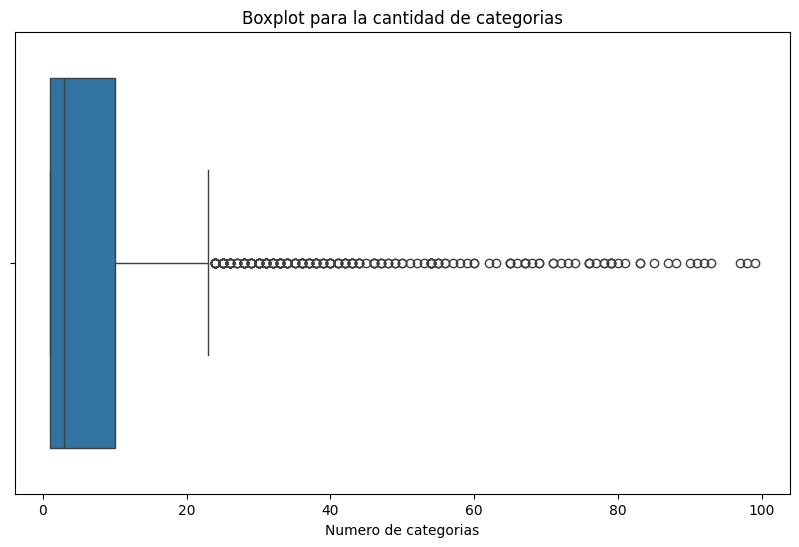

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=sub_category_counts)
plt.title('Boxplot para la cantidad de categorias')
plt.xlabel('Numero de categorias')
plt.show()

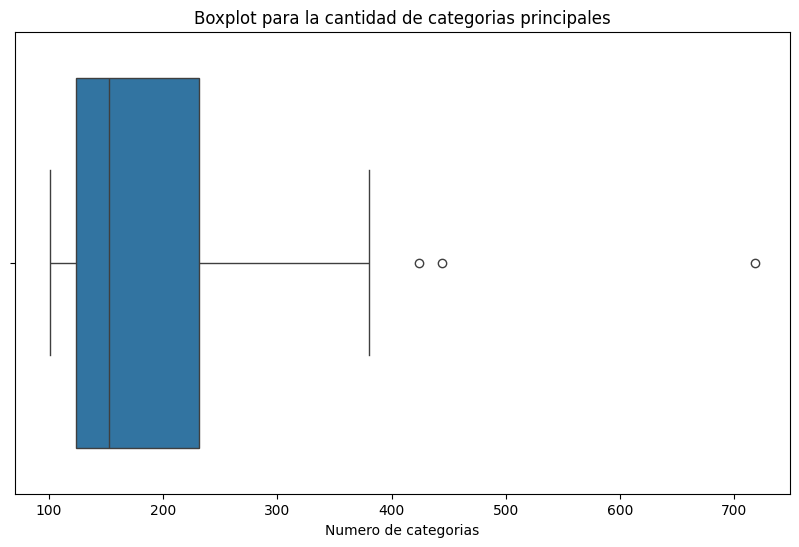

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=main_category_counts)
plt.title('Boxplot para la cantidad de categorias principales')
plt.xlabel('Numero de categorias')
plt.show()

sub categorias podemos ver que hay muchas menores a 20, vamos a dividirlas en una tercer categoria "niche"

In [50]:
niche_category_counts = sub_category_counts[sub_category_counts < 20]
sub_category_counts = sub_category_counts[sub_category_counts > 20]

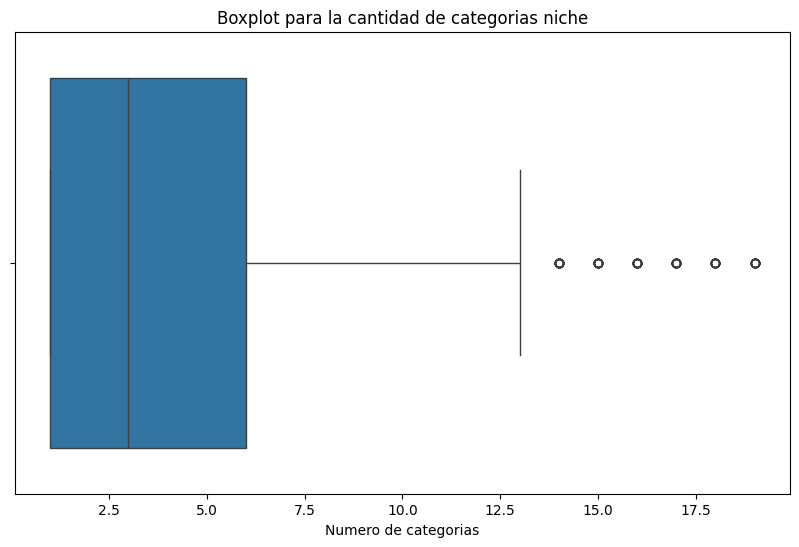

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=niche_category_counts)
plt.title('Boxplot para la cantidad de categorias niche')
plt.xlabel('Numero de categorias')
plt.show()

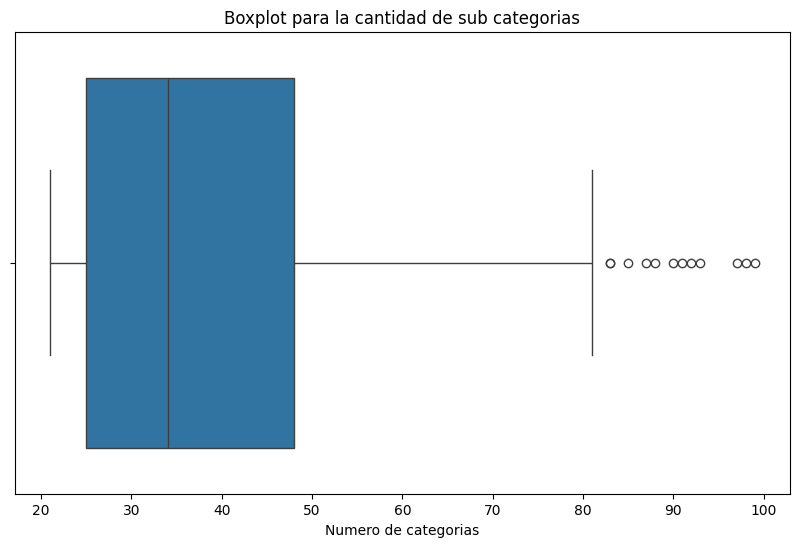

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=sub_category_counts)
plt.title('Boxplot para la cantidad de sub categorias')
plt.xlabel('Numero de categorias')
plt.show()

In [53]:
print(f"Niche categorias: ",niche_category_counts.count())
print(f"Sub categorias: ",sub_category_counts.count())
print(f"Main categorias: ",main_category_counts.count())

Niche categorias:  1872
Sub categorias:  259
Main categorias:  46


In [55]:
main_category_counts.head(10)

category
Restaurant            718
Beauty salon          444
Grocery store         424
Auto repair shop      380
Hair salon            350
Nail salon            338
Church                301
Barber shop           290
Bar                   282
Chinese restaurant    265
Name: count, dtype: int64

In [56]:
sub_category_counts.head(10)

category
Women's clothing store    99
Event venue               98
Corporate office          97
Real estate agency        93
Gift shop                 92
Telephone company         91
Pizza delivery            90
Auto insurance agency     88
Tire shop                 87
Parking lot               85
Name: count, dtype: int64

In [57]:
niche_category_counts.head(10)

category
Custom t-shirt store           19
Clothing alteration service    19
Middle Eastern restaurant      19
Carpet cleaning service        19
Mobile phone repair shop       19
Cake shop                      19
Immigration attorney           19
Divorce lawyer                 19
Hospital                       19
Family law attorney            19
Name: count, dtype: int64